In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

rc_params = {
    'lines.linewidth': 2,  # Set line width to 2 points
    'font.family': 'STIXGeneral',  # Set color cycle for axes
    'ytick.direction': 'in',  # Set figure size in inches
    'xtick.direction': 'in',  # Set default font family
}

matplotlib.rcParams.update(rc_params)

/home/jurados/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
ligth_curves = pd.read_csv('./data/master_lightcurves_ztfxtns.csv')
ligth_curves

,oid,fid,mjd,mag,e_mag,isdiffpos,rfid,candid,pid,forced,source_id,type,redshift,filter
0,ZTF17aaaipbw,2,58371.472130,19.820711,0.168984,-1.0,615120234.0,6.174721e+17,NaN,no,2017ixz,SNIIb,0.0240,orange
1,ZTF17aaaipbw,2,58374.515428,19.959324,0.179207,-1.0,615120234.0,6.205154e+17,NaN,no,2017ixz,SNIIb,0.0240,orange
2,ZTF17aaaipbw,2,58377.464780,19.914448,0.173840,-1.0,615120234.0,6.234648e+17,NaN,no,2017ixz,SNIIb,0.0240,orange
3,ZTF17aaaipbw,2,58380.473310,19.946108,0.188807,-1.0,615120234.0,6.264733e+17,NaN,no,2017ixz,SNIIb,0.0240,orange
4,ZTF17aaaipbw,2,58389.518542,19.876314,0.189524,-1.0,615120234.0,6.355185e+17,NaN,no,2017ixz,SNIIb,0.0240,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215997,ZTF19abgbbzy,1,60437.283275,100.000000,100.000000,NaN,NaN,NaN,2.683283e+12,yes,2019lqo,SNII,0.0103,G
215998,ZTF19abgbbzy,3,60437.156065,17.361410,0.030229,NaN,NaN,NaN,2.683156e+12,yes,2024gzk,SNIIb,0.0103,NaN
215999,ZTF19abgbbzy,3,60437.156065,17.361410,0.030229,NaN,NaN,NaN,2.683156e+12,yes,2019lqo,SNII,0.0103,G
216000,ZTF19abgbbzy,2,60451.301435,18.351860,0.068626,NaN,NaN,NaN,2.697301e+12,yes,2024gzk,SNIIb,0.0103,NaN


In [3]:
spectra = pd.read_pickle('spectra_wisrep_20240622.pkl')
spectra

,oid,snname,instrument,mjd,lambda_grid_min,lambda_grid_max,nlambda_grid,lambda_data_min,lambda_data_max,flux_lambda,e_flux_lambda
0,12000,SN2021aefs,ESO-NTT_EFOSC2-NTT_ePESSTOp.asci,59560.313577,3206.34,10915.01,1838,3651.341553,9244.899935,"[1.91091e-16, 1.82705e-16, 1.97729e-16, 1.8812...","[7.185204317077444e-18, 1.5696079042524182e-17..."
1,12001,SN2021aefs,P60_SEDM_TNS.ascii,59559.436690,3206.34,10915.01,1838,3651.341553,9244.899935,"[1.91091e-16, 1.82705e-16, 1.97729e-16, 1.8812...","[7.185204317077444e-18, 1.5696079042524182e-17..."
2,12002,SN2020rsc,Keck1_LRIS_TNS.ascii,59226.000000,3206.34,10915.01,1838,3077.048800,10304.617000,"[2.03112e-16, 2.94057e-16, 2.56117e-16, 3.6180...","[5.4224405104354494e-17, 5.302190662866851e-17..."
3,12003,SN2011kg,HST_WFC3_PTF.dat,55943.000000,3206.34,10915.01,1838,1903.618857,10615.877400,"[0.2298616, 0.1718295, 0.1137441, 0.0555966, -...","[0.0374385692592133, 0.03915660996486737, 0.04..."
4,12004,SN2011kg,Keck1_LRIS_PTF.dat,55926.000000,3206.34,10915.01,1838,1903.618857,10615.877400,"[0.2298616, 0.1718295, 0.1137441, 0.0555966, -...","[0.0374385692592133, 0.03915660996486737, 0.04..."
...,...,...,...,...,...,...,...,...,...,...,...
3064,9064,PTF10tky,Mayall_RC-Spec_PTF.ascii,55447.000000,3206.34,10915.01,1838,3499.337183,8435.216325,"[2.009414e-17, 5.0141400000000007e-17, 4.24290...","[1.7117255985857287e-17, 1.563774964810526e-17..."
3065,9065,SN2005U,FLWO-1.5m_FAST_CfA-Stripped.flm,53402.400000,3206.34,10915.01,1838,3485.000000,7411.370000,"[5.508120990000001, 5.508120990000001, 5.50812...","[0.5603715492364529, 0.5603715492364529, 0.560..."
3066,9066,SN2005U,FLWO-1.5m_FAST_CfA-Stripped.flm,53431.320000,3206.34,10915.01,1838,3485.000000,7411.370000,"[5.508120990000001, 5.508120990000001, 5.50812...","[0.5603715492364529, 0.5603715492364529, 0.560..."
3067,9067,SN2005U,FLWO-1.5m_FAST_CfA-Stripped.flm,53443.350000,3206.34,10915.01,1838,3485.000000,7411.370000,"[5.508120990000001, 5.508120990000001, 5.50812...","[0.5603715492364529, 0.5603715492364529, 0.560..."


In [7]:
spectra.columns

Index(['oid', 'snname', 'instrument', 'mjd', 'lambda_grid_min',
       'lambda_grid_max', 'nlambda_grid', 'lambda_data_min', 'lambda_data_max',
       'flux_lambda', 'e_flux_lambda'],
      dtype='object')

In [63]:
spectra_metadata = pd.read_csv('wiserep_spectra_metadata.csv', low_memory=False)
spectra_metadata.head()

,Obj. ID,IAU name,Internal name/s,Obj. RA,Obj. DEC,Obj. Type,Redshift,Spec. ID,Obs-date,JD,...,Grating,Blaze,Lambda-min,Lambda-max,Del-Lambda,Contrib,Publish,Remarks,Created by,Creation date
0,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17656,1999-02-09 00:00:00.00,2451218.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
1,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17657,1999-02-10 00:00:00.00,2451219.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
2,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17658,1999-02-13 00:00:00.00,2451222.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
3,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17659,1999-02-23 00:00:00.00,2451232.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
4,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17660,1999-04-10 00:00:00.00,2451278.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53


In [65]:
supernovae_cross_names = [
    spectra_metadata['Obj. ID'],
    spectra_metadata['IAU name'], 
    spectra_metadata['Internal name/s'].apply(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else x)
]
supernovae_cross_names[0].name, supernovae_cross_names[1].name, supernovae_cross_names[2].name = 'Obj. ID', 'IAU name', 'Internal name'
supernovae_cross_names = pd.concat(supernovae_cross_names, axis=1)
supernovae_cross_names

,Obj. ID,IAU name,Internal name
0,5875,SN 1999Z,NaN
1,5875,SN 1999Z,NaN
2,5875,SN 1999Z,NaN
3,5875,SN 1999Z,NaN
4,5875,SN 1999Z,NaN
...,...,...,...
46446,8896,SN 2016hhv,ATLAS16drn
46447,8896,SN 2016hhv,ATLAS16drn
46448,205,SN 2016hht,PS17aja
46449,427,SN 2016hhj,iPTF16hhj


In [55]:
indx = 12000
spectra_test = spectra.iloc[indx]

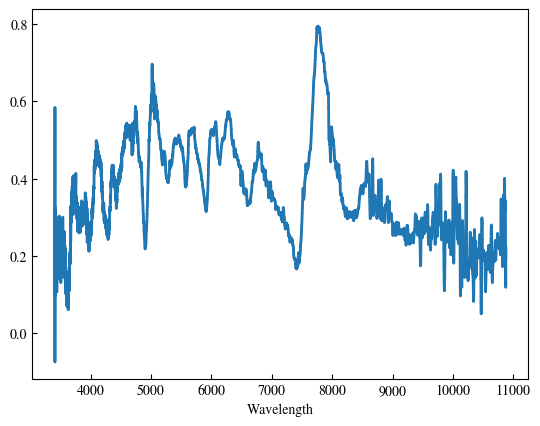

In [58]:
x = np.logspace(np.log10(spectra_test.lambda_data_min),np.log10(spectra_test.lambda_data_max),len(eval(spectra_test.flux_lambda)))
fig, ax = plt.subplots()
ax.plot(x,eval(spectra_test.flux_lambda))
ax.set_xlabel('Wavelength')

plt.show()

In [8]:
lambda_absorption_line = {'4861':'Hbeta',
                          '5018': 'Fe II',
                          '5169': 'Fe Ii',
                          '6563':'Halpha'}

ValueError: too many values to unpack (expected 2)

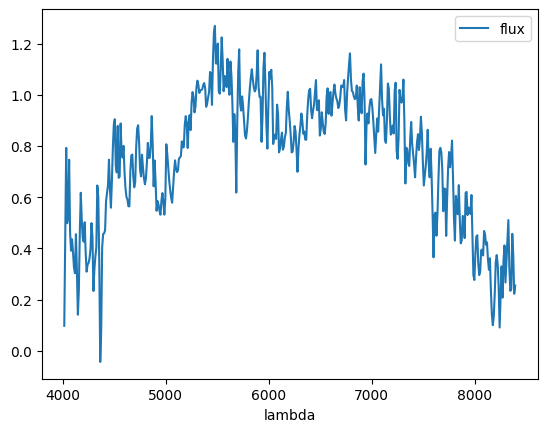

In [11]:
data.plot(x='lambda',y='flux',kind='line')
for line, text in lambda_absorption_line:
    plt.axvline(x=float(line), color='black')
    plt.text(x=float(line)+0.1, y=1.2, s=text)

In [3]:
import numpy as np
from scipy import interpolate

In [16]:
# Datos de ejemplo
x = [0, 1, 2, 3, 4]
y = [0, 1, 0, 1, 0]

# Crear la función interpolante
f = interpolate.interp1d(x, y, fill_value=np.nan, bounds_error=False)
#x_new = np.arange(-1,10,1)
x_new = np.linspace(-1,10,10)
print('x_new:',x_new)

# Intentar interpolar fuera del rango
print(f(x_new))

x_new: [-1.          0.22222222  1.44444444  2.66666667  3.88888889  5.11111111
  6.33333333  7.55555556  8.77777778 10.        ]
[       nan 0.22222222 0.55555556 0.66666667 0.11111111        nan
        nan        nan        nan        nan]


In [15]:
flujo = lambda x,x0,x1,f0,f1: f0 * ((x1-x)/(x1-x0)) + f1 * ((x-x0)/(x1-x0)) 
flujo(0.5,0,1,0,1)

0.5